In the context of the `BaggingClassifier` in scikit-learn, the **`max_features`** parameter determines the **number of features to consider when creating each base estimator** (e.g., decision tree, logistic regression, etc.) in the ensemble model.

### **Explanation of `max_features`**
- **Default Value**: `max_features=1.0` (uses all features in the dataset).
- **Effect**: Specifies the fraction or absolute number of features to randomly select for each base estimator:
  - If a **float** (e.g., `0.5`), it represents a fraction of the total number of features.
  - If an **integer** (e.g., `2`), it specifies the exact number of features to select.

---

### **Why Use `max_features`?**
- **Introduce diversity**: Reduces correlation between base estimators by using only a subset of features for each estimator, which can improve generalization.
- **Control over complexity**: Helps avoid overfitting by limiting the feature space for each base estimator.


### **How `max_features=2` Works in the Example**:
1. Each decision tree in the ensemble is trained using only **2 randomly selected features** from the total 10 features in `X`.
2. These subsets of features vary across the base estimators, which enhances diversity and robustness.

---

### **Key Points**:
- `max_features` ensures each estimator gets only a fraction or subset of features.
- Works similarly to **random feature selection** in Random Forests but is customizable in Bagging.

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [2]:
X,y = make_classification(n_features=5, n_redundant=0, n_informative=5,n_clusters_per_class=1)

In [3]:
df = pd.DataFrame(X,columns=['col1','col2','col3','col4','col5'])
df['target'] = y
print(df.shape)
df.head()

(100, 6)


,col1,col2,col3,col4,col5,target
0,-1.100470,2.372051,0.136621,-1.701601,3.429923,1
1,-1.126659,1.628396,-0.848473,-0.243185,1.011828,1
2,-0.818704,-1.624869,0.602033,1.427711,-2.083096,0
3,-1.823325,0.825308,-3.048044,3.140306,-3.448366,0
4,-1.470763,1.205455,1.579810,2.518869,0.890559,1


In [4]:
bag = BaggingClassifier(max_features=3)

In [5]:
bag.fit(df.iloc[:,:5],df.iloc[:,-1])

BaggingClassifier(max_features=3)

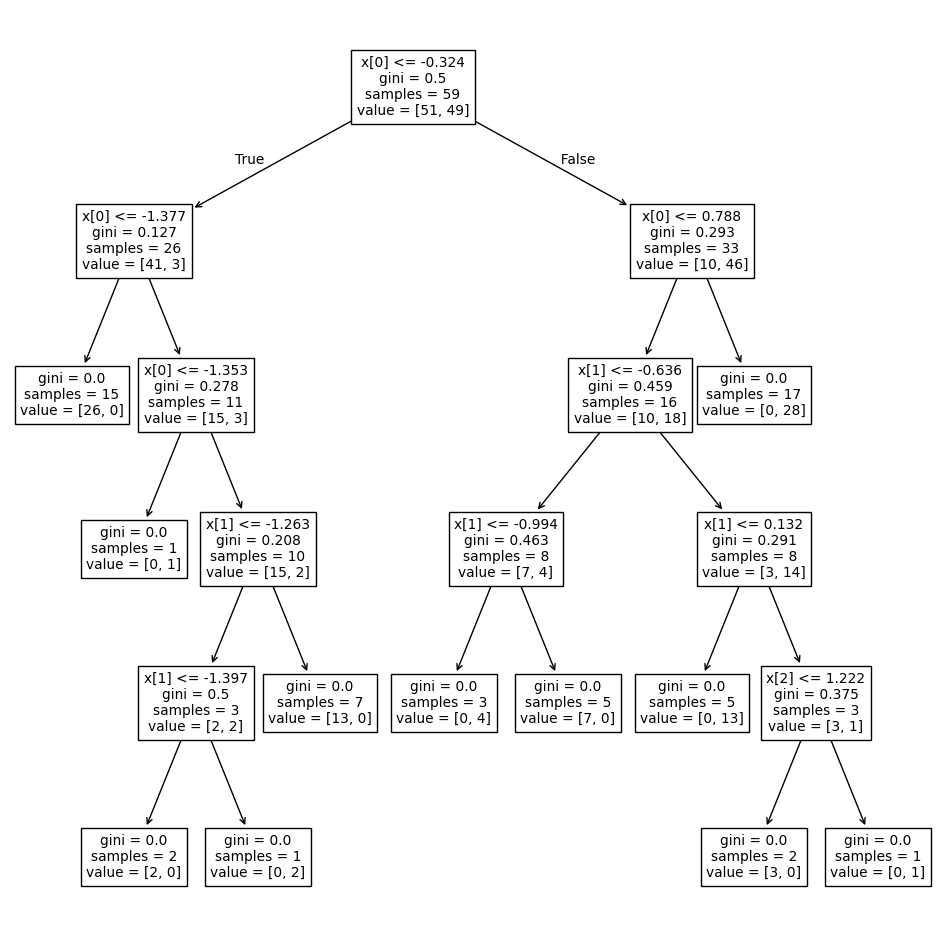

In [6]:
plt.figure(figsize=(12,12))
plot_tree(bag.estimators_[0])
plt.show()

In [26]:
rf = RandomForestClassifier(max_features=2)

In [27]:
rf.fit(df.iloc[:,:5],df.iloc[:,-1])

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=2,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

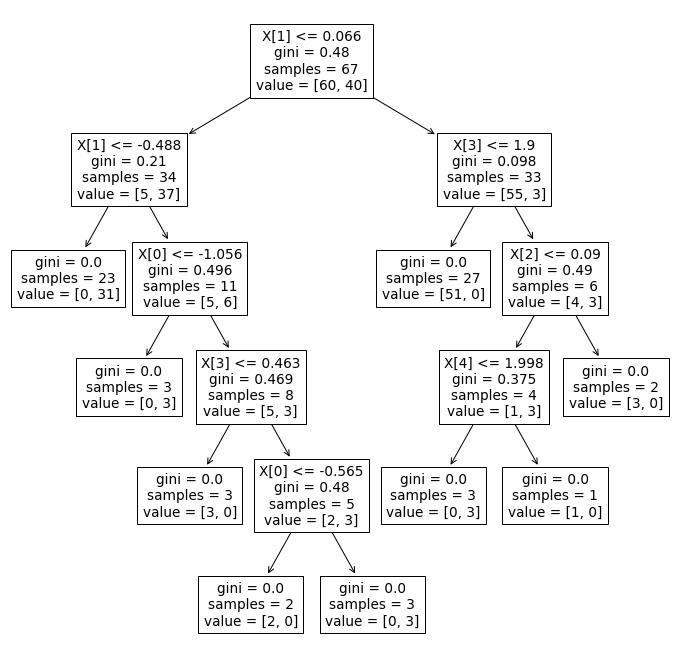

In [28]:
plt.figure(figsize=(12,12))
plot_tree(rf.estimators_[4])
plt.show()